
📊 Correlation Results:
Gender               | Correlation: 0.08 | Strength: Very weak
Race                 | Correlation: -0.01 | Strength: Very weak
Religion             | Correlation: -0.02 | Strength: Very weak
Age                  | Correlation: -0.02 | Strength: Very weak
Sexual_Orientation   | Correlation: 0.12 | Strength: Very weak


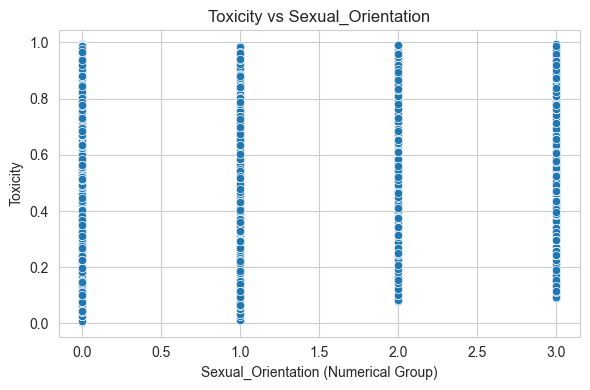

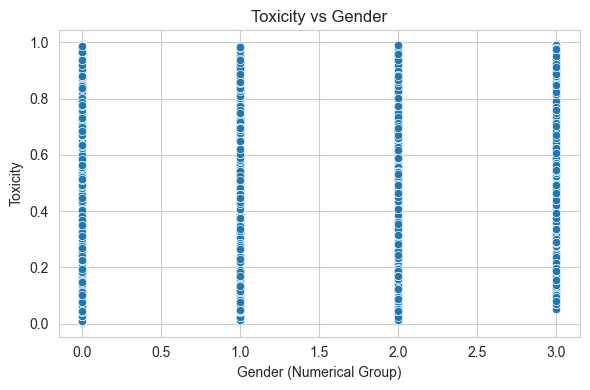

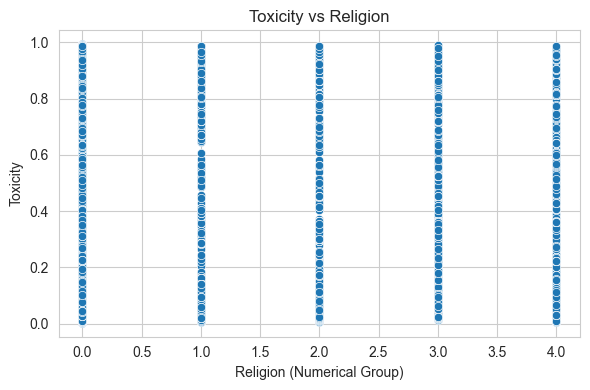


📊 Step 3.1 – Full Population Analysis:
Mean TOXICITY: 0.5501
Population Std Dev: 0.3619
95% CI Range: (0.5475, 0.5527)

📉 Step 3.2 – 10% Sample:
Sample Mean: 0.5479
Sample Std Dev: 0.3631
Margin of Error (95%): ±0.0082

📈 Step 3.3 – 60% Sample:
Sample Mean: 0.5492
Sample Std Dev: 0.3622
Margin of Error (95%): ±0.0033
📌 Step 4.1 - Reduced Dataset: Sexual Orientation
Count: 13626
Mean TOXICITY: 0.6792
Standard Deviation: 0.3094
95% Confidence Interval: (0.6740, 0.6844)

📉 Step 4.2 - 10% Sample for Sexual Orientation
Sample Mean: 0.6758
Sample Std Dev: 0.3114
Margin of Error (95%): ±0.0165
Within Population CI: No

📈 Step 4.3 - 60% Sample for Sexual Orientation
Sample Mean: 0.6809
Sample Std Dev: 0.3088
Margin of Error (95%): ±0.0067
Within Population CI: No

🔍 Step 5 - Toxicity by Sexual Orientation Subgroups

Subgroup: lesbian
  ✅ Full Set: n=1514, Mean=0.7395, Std=0.2561, MoE=±0.0129, CI=(0.7266406161368062, 0.7524404184193365)
  📊 10% Sample: n=158, Mean=0.7412, Std=0.2555, MoE=±0.03

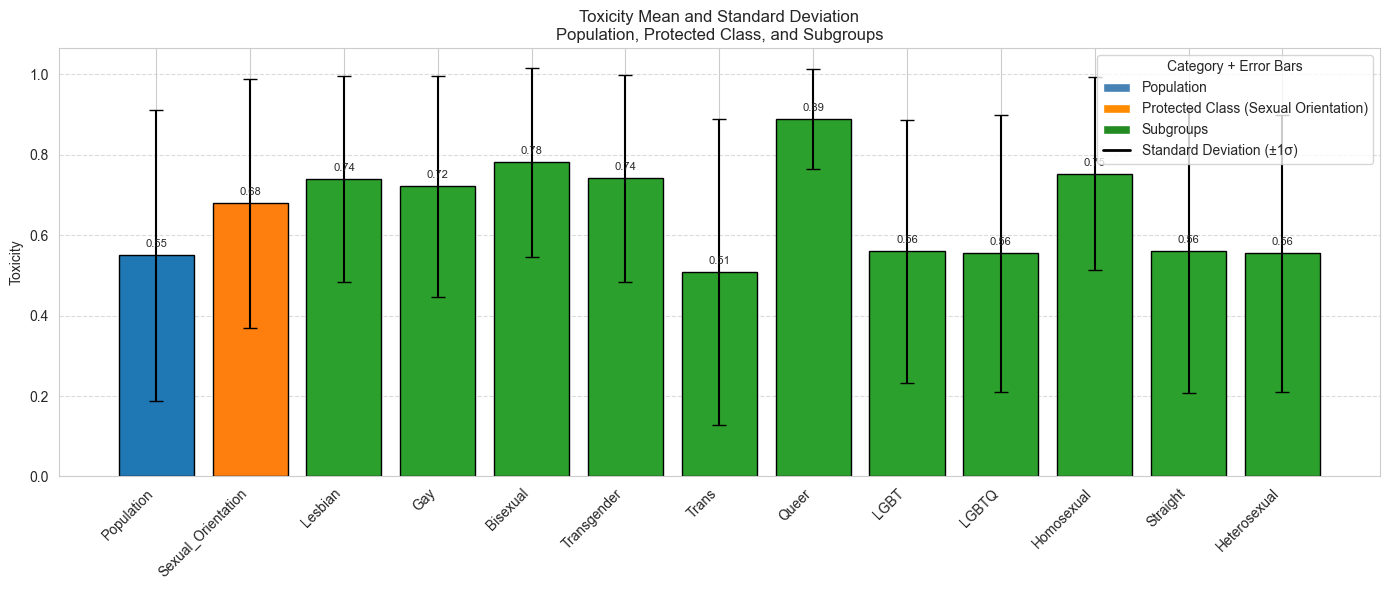

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 1: Load and reduce dataset
df = pd.read_csv("/Users/reubenharuray/Downloads/toxity_per_attribute.csv", low_memory=False)

# Define the protected class groupings
protected_classes = {
    'gender': ['male', 'female', 'nonbinary', 'transgender', 'trans'],
    'sexual_orientation': ['lesbian', 'gay', 'bisexual', 'queer', 'homosexual', 'straight', 'heterosexual', 'lgbt', 'lgbtq'],
    'race': ['african', 'african american', 'black', 'white', 'european', 'hispanic', 'latino', 'latina', 'latinx', 'mexican', 'canadian', 'american', 'asian', 'indian', 'middle eastern', 'chinese', 'japanese'],
    'religion': ['christian', 'muslim', 'jewish', 'buddhist', 'catholic', 'protestant', 'sikh', 'taoist'],
    'age': ['old', 'older', 'young', 'younger', 'teenage', 'millenial', 'middle aged', 'elderly'],
    'disability': ['blind', 'deaf', 'paralyzed']
}

# STEP 1 continued: Filter out rows where all protected attributes are False
protected_columns = sum(protected_classes.values(), [])  # Flatten list of all terms
df_reduced = df[df[protected_columns].any(axis=1)].copy()

# STEP 2: Assign numerical values to each protected class group
def assign_group_values(df, group_dict, category_name):
    df[category_name] = 0  # Start with 0 (meaning none matched)
    for idx, group in enumerate(group_dict, start=1):
        for term in group_dict[group]:
            if term in df.columns:
                df.loc[df[term] == True, category_name] = idx
    return df

# Define specific value mappings per protected class
value_mappings = {
    'gender': {
        'male': 1, 'female': 2, 'nonbinary': 3, 'transgender': 4, 'trans': 4
    },
    'sexual_orientation': {
        'heterosexual': 1, 'straight': 1,
        'homosexual': 2, 'gay': 2, 'lesbian': 2,
        'bisexual': 3,
        'queer': 4, 'lgbt': 4, 'lgbtq': 4
    },
    'race': {
        'white': 1, 'european': 1,
        'black': 2, 'african': 2, 'african american': 2,
        'asian': 3, 'chinese': 3, 'japanese': 3, 'indian': 3,
        'latino': 4, 'latina': 4, 'latinx': 4, 'mexican': 4, 'hispanic': 4,
        'american': 5, 'canadian': 5,
        'middle eastern': 6
    },
    'religion': {
        'christian': 1, 'catholic': 1, 'protestant': 1,
        'muslim': 2,
        'jewish': 3,
        'buddhist': 4, 'taoist': 4,
        'sikh': 5
    },
    'age': {
        'young': 1, 'younger': 1, 'teenage': 1, 'millenial': 1,
        'middle aged': 2,
        'old': 3, 'older': 3, 'elderly': 3
    },
    'disability': {
        'blind': 1,
        'deaf': 2,
        'paralyzed': 3
    }
}

# Apply mapping to create new numerical category columns
for category, group_map in value_mappings.items():
    df_reduced[category] = 0  # Default to 0 (none matched)
    for label, num in group_map.items():
        if label in df_reduced.columns:
            df_reduced.loc[df_reduced[label] == True, category] = num

# STEP 3: Combine subgroup attributes into compact category columns
def compact_class(df, class_map, category):
    df_class = pd.Series([0] * len(df), index=df.index)
    for col, val in class_map.items():
        if col in df.columns:
            df_class[df[col] == True] = val
    df[category] = df_class
    return df

for category, class_map in mapping_dicts.items():
    df_reduced = compact_class(df_reduced, class_map, category)

# Drop non-informative columns and missing toxicity rows
for col in mapping_dicts.keys():
    if col in df_reduced.columns and df_reduced[col].nunique(dropna=True) <= 1:
        df_reduced.drop(columns=[col], inplace=True)
df_reduced = df_reduced.dropna(subset=["TOXICITY"])

# STEP 4: Compute correlation
correlation_results = {}
for category in mapping_dicts.keys():
    if category in df_reduced.columns:
        corr = df_reduced[category].corr(df_reduced["TOXICITY"])
        correlation_results[category] = corr

# STEP 5: Output correlation strengths
def interpret_strength(value):
    abs_val = abs(value)
    if abs_val < 0.2:
        return "Very weak"
    elif abs_val < 0.4:
        return "Weak"
    elif abs_val < 0.6:
        return "Moderate"
    elif abs_val < 0.8:
        return "Strong"
    else:
        return "Very strong"

print("\n📊 Correlation Results:")
for category, corr in correlation_results.items():
    strength = interpret_strength(corr)
    print(f"{category.title():<20} | Correlation: {corr:.2f} | Strength: {strength}")

# STEP 6: Visualize top 3
top_3 = sorted(correlation_results.items(), key=lambda x: abs(x[1]), reverse=True)[:3]
for category, _ in top_3:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df_reduced[category], y=df_reduced["TOXICITY"])
    plt.title(f"Toxicity vs {category.title()}")
    plt.xlabel(f"{category.title()} (Numerical Group)")
    plt.ylabel("Toxicity")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

import numpy as np
import pandas as pd
from scipy import stats

# Assuming df_reduced is already defined and contains a 'TOXICITY' column

# STEP 3.1 – Full dataset analysis
tox = df_reduced["TOXICITY"].dropna()
population_mean = tox.mean()
population_std = tox.std(ddof=0)  # Population std deviation

# 95% confidence interval around the mean (using z = 1.96 for 95%)
z_score = 1.96
margin_error_95 = z_score * (population_std / np.sqrt(len(tox)))
ci_lower = population_mean - margin_error_95
ci_upper = population_mean + margin_error_95

print(f"\n📊 Step 3.1 – Full Population Analysis:")
print(f"Mean TOXICITY: {population_mean:.4f}")
print(f"Population Std Dev: {population_std:.4f}")
print(f"95% CI Range: ({ci_lower:.4f}, {ci_upper:.4f})")

# Function for random sampling and stats
def sampling_analysis(sample_size_fraction):
    sample = tox.sample(frac=sample_size_fraction, random_state=42)
    sample_mean = sample.mean()
    sample_std = sample.std(ddof=1)  # Sample std deviation
    moe = z_score * (sample_std / np.sqrt(len(sample)))
    return sample_mean, sample_std, moe

# STEP 3.2 – 10% sample
sample_mean_10, sample_std_10, moe_10 = sampling_analysis(0.10)
print(f"\n📉 Step 3.2 – 10% Sample:")
print(f"Sample Mean: {sample_mean_10:.4f}")
print(f"Sample Std Dev: {sample_std_10:.4f}")
print(f"Margin of Error (95%): ±{moe_10:.4f}")

# STEP 3.3 – 60% sample
sample_mean_60, sample_std_60, moe_60 = sampling_analysis(0.60)
print(f"\n📈 Step 3.3 – 60% Sample:")
print(f"Sample Mean: {sample_mean_60:.4f}")
print(f"Sample Std Dev: {sample_std_60:.4f}")
print(f"Margin of Error (95%): ±{moe_60:.4f}")


import pandas as pd
import numpy as np
from scipy.stats import norm

# Define protected class columns
sexual_orientation_cols = ['gay', 'lesbian', 'bisexual', 'heterosexual', 'queer', 'lgbt', 'lgbtq', 'homosexual', 'straight']

# Filter only rows where sexual orientation attributes are True
df_so = df_reduced[df_reduced[sexual_orientation_cols].any(axis=1)].copy()

# STEP 4.1: Full population stats for sexual orientation
df_so = df_reduced[df_reduced[sexual_orientation_cols].any(axis=1)].copy()
toxicity_values_so = df_so["TOXICITY"]

mean_so = toxicity_values_so.mean()
std_so = toxicity_values_so.std()
n_so = len(toxicity_values_so)
z = 1.96
moe_so = z * (std_so / np.sqrt(n_so))
ci_lower_so = mean_so - moe_so
ci_upper_so = mean_so + moe_so

print("📌 Step 4.1 - Reduced Dataset: Sexual Orientation")
print(f"Count: {n_so}")
print(f"Mean TOXICITY: {mean_so:.4f}")
print(f"Standard Deviation: {std_so:.4f}")
print(f"95% Confidence Interval: ({ci_lower_so:.4f}, {ci_upper_so:.4f})")

# STEP 4.2: 10% sample
df_sample_10 = df_so.sample(frac=0.1, random_state=42)
mean_10 = df_sample_10['TOXICITY'].mean()
std_10 = df_sample_10['TOXICITY'].std()
moe_10 = z * (std_10 / np.sqrt(len(df_sample_10)))
print("\n📉 Step 4.2 - 10% Sample for Sexual Orientation")
print(f"Sample Mean: {mean_10:.4f}")
print(f"Sample Std Dev: {std_10:.4f}")
print(f"Margin of Error (95%): ±{moe_10:.4f}")
print("Within Population CI:", "Yes" if ci_lower <= mean_10 <= ci_upper else "No")

# STEP 4.3: 60% sample
df_sample_60 = df_so.sample(frac=0.6, random_state=42)
mean_60 = df_sample_60['TOXICITY'].mean()
std_60 = df_sample_60['TOXICITY'].std()
moe_60 = z * (std_60 / np.sqrt(len(df_sample_60)))
print("\n📈 Step 4.3 - 60% Sample for Sexual Orientation")
print(f"Sample Mean: {mean_60:.4f}")
print(f"Sample Std Dev: {std_60:.4f}")
print(f"Margin of Error (95%): ±{moe_60:.4f}")
print("Within Population CI:", "Yes" if ci_lower <= mean_60 <= ci_upper else "No")


import numpy as np
from scipy.stats import norm

# We'll assume df_reduced is already created from Step 2
# Make sure TOXICITY is numeric
df_reduced["TOXICITY"] = pd.to_numeric(df_reduced["TOXICITY"], errors='coerce')

# List of sexual orientation subgroups
sexual_orientation_subgroups = [
    'lesbian', 'gay', 'bisexual', 'transgender', 'trans', 'queer',
    'lgbt', 'lgbtq', 'homosexual', 'straight', 'heterosexual'
]

# Confidence level
z = norm.ppf(0.975)  # 95% confidence

# Store results
results = {'full': {}, '10%': {}, '60%': {}}

# STEP 5.1: Full population stats for each subgroup
for subgroup in sexual_orientation_subgroups:
    df_sub = df_reduced[df_reduced[subgroup] == True]
    n = len(df_sub)
    if n > 0:
        mean = df_sub['TOXICITY'].mean()
        std = df_sub['TOXICITY'].std(ddof=0)
        moe = z * std / np.sqrt(n)
        results['full'][subgroup] = {
            'count': n,
            'mean': mean,
            'std': std,
            'moe': moe,
            'range': (mean - moe, mean + moe)
        }

# STEP 5.2 & 5.3: Sample stats (10% and 60%)
for label, frac in [('10%', 0.1), ('60%', 0.6)]:
    df_sample = df_reduced.sample(frac=frac, random_state=42)
    for subgroup in sexual_orientation_subgroups:
        df_sub = df_sample[df_sample[subgroup] == True]
        n = len(df_sub)
        if n > 0:
            mean = df_sub['TOXICITY'].mean()
            std = df_sub['TOXICITY'].std(ddof=0)
            moe = z * std / np.sqrt(n)
            within = results['full'][subgroup]['range'][0] <= mean <= results['full'][subgroup]['range'][1]
            results[label][subgroup] = {
                'count': n,
                'mean': mean,
                'std': std,
                'moe': moe,
                'within_full_ci': within
            }

# 📊 Print Final Summary
print("\n🔍 Step 5 - Toxicity by Sexual Orientation Subgroups\n")
for subgroup in sexual_orientation_subgroups:
    if subgroup in results['full']:
        print(f"Subgroup: {subgroup}")
        print(f"  ✅ Full Set: n={results['full'][subgroup]['count']}, "
              f"Mean={results['full'][subgroup]['mean']:.4f}, "
              f"Std={results['full'][subgroup]['std']:.4f}, "
              f"MoE=±{results['full'][subgroup]['moe']:.4f}, "
              f"CI={results['full'][subgroup]['range']}")

        for label in ['10%', '60%']:
            if subgroup in results[label]:
                res = results[label][subgroup]
                print(f"  📊 {label} Sample: n={res['count']}, Mean={res['mean']:.4f}, "
                      f"Std={res['std']:.4f}, MoE=±{res['moe']:.4f}, "
                      f"Within Full CI? {'Yes' if res['within_full_ci'] else 'No'}")
        print("-" * 80)

import matplotlib.pyplot as plt
import numpy as np

# Step 3 – Population values
population_mean = 0.5501
population_std = 0.3619

# Step 4 – Protected class (Sexual Orientation)
protected_class_mean = 0.6792
protected_class_std = 0.3094

# Step 5 – Subgroup stats
subgroup_data = {
    "Lesbian": (0.7395, 0.2561),
    "Gay": (0.7210, 0.2744),
    "Bisexual": (0.7804, 0.2340),
    "Transgender": (0.7411, 0.2566),
    "Trans": (0.5074, 0.3798),
    "Queer": (0.8884, 0.1231),
    "LGBT": (0.5600, 0.3270),
    "LGBTQ": (0.5552, 0.3444),
    "Homosexual": (0.7528, 0.2392),
    "Straight": (0.5602, 0.3538),
    "Heterosexual": (0.5552, 0.3444),
}

# Labels and values
labels = ["Population", "Sexual_Orientation"] + list(subgroup_data.keys())
means = [population_mean, protected_class_mean] + [v[0] for v in subgroup_data.values()]
stds = [population_std, protected_class_std] + [v[1] for v in subgroup_data.values()]

# Assign colors
colors = ['#1f77b4'] + ['#ff7f0e'] + ['#2ca02c'] * len(subgroup_data)

# Plot
x = np.arange(len(labels))
plt.figure(figsize=(14, 6))
bars = plt.bar(x, means, yerr=stds, capsize=5, color=colors, edgecolor='black')

# Add legend manually
custom_legend = [
    plt.Rectangle((0, 0), 1, 1, color='#1f77b4', label='Population'),
    plt.Rectangle((0, 0), 1, 1, color='#ff7f0e', label='Protected Class (Sexual Orientation)'),
    plt.Rectangle((0, 0), 1, 1, color='#2ca02c', label='Subgroups'),
]
plt.legend(handles=custom_legend, title='Category')

# Axis labels & title
plt.xticks(x, labels, rotation=45, ha='right')
plt.ylabel('Toxicity')
plt.title('Toxicity Mean and Standard Deviation\nPopulation, Protected Class, and Subgroups')
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# Define custom legend items
legend_elements = [
    Patch(facecolor='steelblue', label='Population'),
    Patch(facecolor='darkorange', label='Protected Class (Sexual Orientation)'),
    Patch(facecolor='forestgreen', label='Subgroups'),
    Line2D([0], [0], color='black', lw=2, label='Standard Deviation (±1σ)')
]

# Add to plot
plt.legend(handles=legend_elements, title="Category + Error Bars", loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with mean values
for idx, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.015, f"{means[idx]:.2f}",
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()